![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [6]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


- Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`

In [7]:
# Start coding here
# Use as many cells as you need
crimes["hour"] = crimes["TIME OCC"].str[:2].astype(int)
print(crimes.head())

       DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME                                      Crm Cd Desc  Vict Age Vict Sex Vict Descent Weapon Desc  Status Desc                                  LOCATION  hour
0  221412410 2022-06-15 2020-11-12     1700      Pacific  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN          NaN         NaN  Invest Cont  13600    MARINA POINT                 DR    17
1  220314085 2022-07-22 2020-05-12     1110    Southwest                                THEFT OF IDENTITY        27        F            B         NaN  Invest Cont   2500 S  SYCAMORE                     AV    11
2  222013040 2022-08-06 2020-06-04     1620      Olympic                                THEFT OF IDENTITY        60        M            H         NaN  Invest Cont   3300    SAN MARINO                   ST    16
3  220614831 2022-08-18 2020-08-17     1200    Hollywood                                THEFT OF IDENTITY        28        M            H         NaN  Inves

<Axes: xlabel='hour', ylabel='count'>

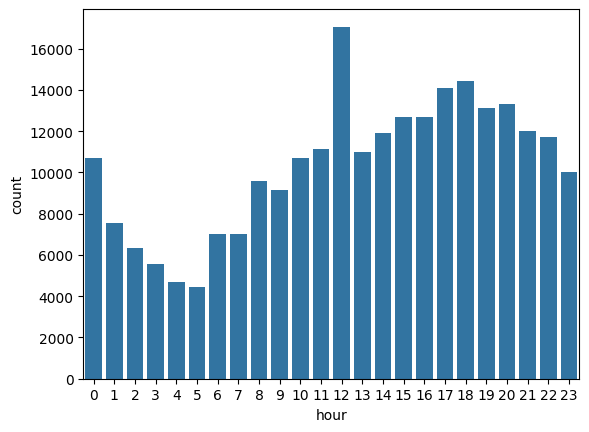

In [8]:
sns.countplot(data=crimes, x="hour")

In [11]:
peak_crime_hour = crimes["hour"].mode()[0]
print(f"The peak hour for crime is {peak_crime_hour} o'clock.")

The peak hour for crime is 12 o'clock.


- Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location`.

In [12]:
night_time = crimes[crimes["hour"].isin([22,23,0,1,2,3])]

peak_night_crime_location = night_time.groupby("AREA NAME", as_index=False)["hour"].count().sort_values("hour", ascending=False).iloc[0]["AREA NAME"]
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is Central


- Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called `victim_ages`, with age group labels `"0-17"`, `"18-25"`, `"26-34"`, `"35-44"`, `"45-54"`, `"55-64"`, and `"65+"` as the index and the frequency of crimes as the values.

In [13]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64
